In [1]:
import pandas as pd ## pandas -- do przetwarzania danych tabelarycznych
import numpy as np ## numpy (numeric python) -- głównie do obliczeń numerycznych 

W `pandas` znajdują się funkcje do wczytywania różnych plików. Przykładowo:

*   `read_excel` -- pozwala na wczytanie danych z MS Excel (xls/x)
*   `read_sas` -- pozwala na wczytanie danych z SAS (`sas7bdat`)



In [6]:
## wczytujemy dane z MS Excel

gosp = pd.read_excel(io = "gospodarstwa.xlsx")
gosp.head()

,klm,woj,trb,zut,d21,d32,d345,d347,d348,d36,d38,d61,d63,los,dochg,wydg
0,1,2,11,5,2,1,1,2,1,69,2,3,3,1.0,1191.41,1037.29
1,1,2,6,1,2,1,2,2,1,74,3,4,2,2.0,821.00,887.01
2,1,2,3,1,1,3,1,2,1,83,3,4,1,4.0,6669.87,6792.13
3,1,2,12,5,2,1,3,3,2,44,2,4,1,3.0,1872.59,1806.83
4,1,2,1,5,1,3,1,2,1,110,5,4,2,2.0,1731.44,2795.08


In [5]:
gosp2 = pd.read_sas("baza2005.sas7bdat")
gosp2.head()

,ROK,NRG,MN,KLM,WOJ,LOS,DOCH,LOS_LT14,LOS_GE14,TG,DOCH_OS,DOCH_EQ
0,b'2005',b'100010111',1486.0,1.0,b'02',3.0,2974.95,0.0,3.0,0.0,991.650,1487.475000
1,b'2005',b'100010121',1444.0,1.0,b'02',2.0,1700.55,0.0,2.0,0.0,850.275,1133.700000
2,b'2005',b'100010211',1444.0,1.0,b'02',2.0,821.56,0.0,2.0,0.0,410.780,547.706667
3,b'2005',b'100010221',2603.0,1.0,b'02',1.0,1369.94,0.0,1.0,1.0,1369.940,1369.940000
4,b'2005',b'100010222',1453.0,1.0,b'02',4.0,9801.88,2.0,2.0,0.0,2450.470,4667.561905


Podstawowe kroki w analizie danych

1. Wizualizacja danych
2. Statystyki opisowe

Zaczniemy od wizualizacji i zaczniemy od trzech typów wykresów:

* histogram
* pudełkowy (*boxplot*)
* wykresu rozrzutu (*scatterplot*)

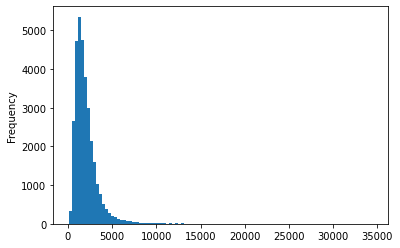

In [12]:
## tworzymy histogram dla zmiennej wydg
gosp.wydg.plot.hist(bins = 100)

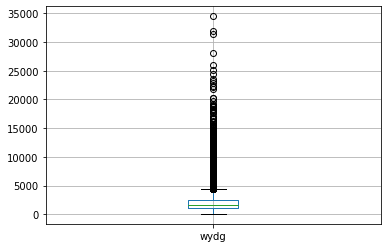

In [15]:
gosp.boxplot(column = 'wydg')

In [13]:
gosp.wydg.describe()

count    32451.000000
mean      2012.712672
std       1511.973936
min         73.900000
25%       1133.675000
50%       1672.740000
75%       2453.140000
max      34493.620000
Name: wydg, dtype: float64

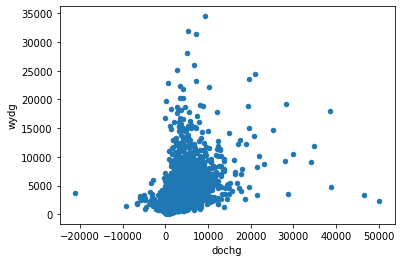

In [16]:
## tworzymy wykres rozrzutu (korelacyjny diagram rozrzutu)

gosp.plot.scatter(x = "dochg", y = "wydg")

In [17]:
### liczenie statystyk opisowych dla zmiennych na skali nominalnej nie powinno mieć miejsca
gosp.trb.describe()

count    32487.000000
mean         6.335273
std          4.389238
min          1.000000
25%          2.000000
50%          6.000000
75%         11.000000
max         12.000000
Name: trb, dtype: float64

Zliczmy ile gospodarstw domowych było według poszczególnych typów. Do tego możemy wykorzystać funkcję `value_counts()`

In [18]:
gosp.trb.value_counts()

12    6279
1     5731
11    5239
3     4288
2     4063
8     3056
4     1429
6     1092
5      604
9      413
10     204
7       89
Name: trb, dtype: int64

Przetwarzania danych przez:

1. wybieranie kolumn
2. wybieranie wierszy
3. tworzenie nowych kolumn
4. usuwanie istniejących kolumn
5. usuwanie wierszy 



In [ ]:
## pierwszy sposób
gosp.klm.head()
## drugi sposób
gosp["klm"].head()
gosp[ ["klm", "wydg"] ] ## jedną lub więcej kolumn

In [30]:
## wybieranie wierszy
gosp.iloc[0]
gosp.iloc[0:10]
gosp.iloc[ [0, 3, 5] ]
gosp.iloc[ [0, 3, 5] , [0, 3, 5]] ## indeksy numerowane

,klm,zut,d32
0,1,5,1
3,1,5,1
5,1,1,1


In [32]:
## po nazwach kolumn
gosp.loc[0:10, ["klm", "zut"]]

,klm,zut
0,1,5
1,1,1
2,1,1
3,1,5
4,1,5
5,1,1
6,1,1
7,1,5
8,1,5
9,1,1


Wybieranie wierszy na podstawie przetwarzania warunkowego


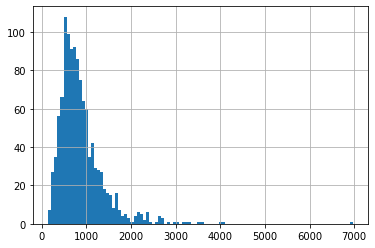

In [42]:
gosp.loc[ gosp.klm == 6 ]
gosp.query("klm == 6 & trb == 11")
gosp.query("klm == 6 & trb == 11")[ ["klm", "trb", "wydg"] ]
gosp.query("klm == 6 & trb == 11").wydg.hist(bins=100)

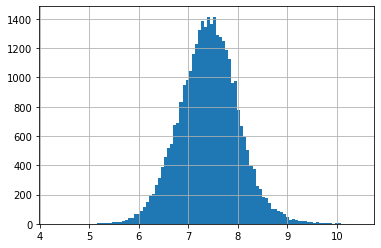

In [43]:
## tworzenie nowych kolumn
gosp["wydg_log"] = np.log(gosp["wydg"]) ## dodajemy nową kolumnę, która będzie logarytmem (naturalnym) zmiennej wydg 

gosp.wydg_log.hist(bins=100)